# Question 1

## (a)

*Hint: use `seaborn.snsplot` to visualize data. use `np.corrcoef` to calculate the correlation matrix and use `seaborn.heatmap` to visualize the correlation matrix.*

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

       A    B    C    D    type  Start assignment
0    6.4  2.9  4.3  1.3   amide                 1
1    5.7  4.4  1.5  0.4  phenol                 2
2    6.7  3.0  5.2  2.3   ether                 0
3    5.8  2.8  5.1  2.4   ether                 1
4    6.4  3.2  5.3  2.3   ether                 0
..   ...  ...  ...  ...     ...               ...
145  5.4  3.9  1.3  0.4  phenol                 1
146  6.3  2.5  5.0  1.9   ether                 0
147  6.0  3.4  4.5  1.6   amide                 0
148  6.2  2.9  4.3  1.3   amide                 0
149  5.6  3.0  4.1  1.3   amide                 0

[150 rows x 6 columns]


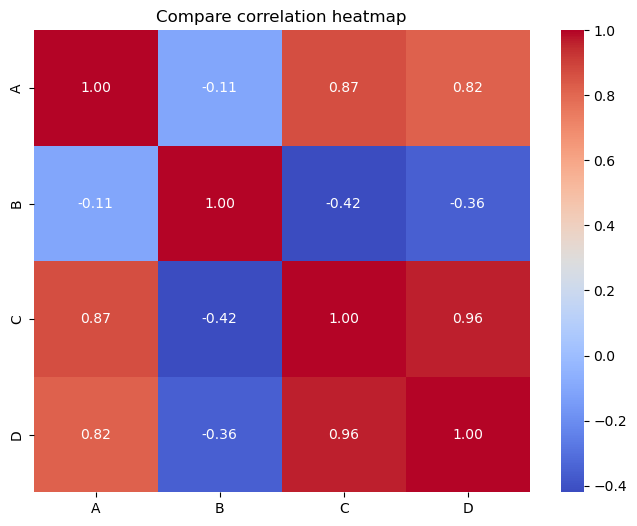

            A         B         C     D    type  Start assignment
0    0.810127  0.659091  0.623188  0.52   amide                 1
1    0.721519  1.000000  0.217391  0.16  phenol                 2
2    0.848101  0.681818  0.753623  0.92   ether                 0
3    0.734177  0.636364  0.739130  0.96   ether                 1
4    0.810127  0.727273  0.768116  0.92   ether                 0
..        ...       ...       ...   ...     ...               ...
145  0.683544  0.886364  0.188406  0.16  phenol                 1
146  0.797468  0.568182  0.724638  0.76   ether                 0
147  0.759494  0.772727  0.652174  0.64   amide                 0
148  0.784810  0.659091  0.623188  0.52   amide                 0
149  0.708861  0.681818  0.594203  0.52   amide                 0

[150 rows x 6 columns]


In [206]:
compounds_data = pd.read_csv('Datasets/compounds.csv')
print(compounds_data)
normalized_compounds = compounds_data.copy()
features = ['A', 'B', 'C', 'D']

for f in features:
    normalized_compounds.loc[:, f] = normalized_compounds.loc[:, f] / (normalized_compounds.loc[:, f].max())
    assert normalized_compounds.loc[:, f].all() <= 1 and normalized_compounds.loc[:, f].all() > 0
mat = normalized_compounds.iloc[:, 0:4].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Compare correlation heatmap")
plt.show()

print(normalized_compounds)

# (a) 
I generated a heatmap above to compare the correlation of features.  It seems that the highest correlations (in red/orange) are: 
- A: with C, D
- B: independent, if not negatively correlated
- C: with A, D
- D: with A, C

A, C, and D are very correlated.  B is not.

## (b)

### \[IMPORTANT\] Fill in and use the KMeans code below. DO NOT USE  `sklearn.cluster.KMeans`.

*Hint: To visualize the clusters, you can use `plt.scatter` and set the `c` parameters. Refer to Tutorial 5.*

In [224]:
import warnings
from scipy.spatial.distance import cdist


class KMeans():
    def __init__(self, n_clusters, max_iter=100):
        self.k = n_clusters
        self.max_iter = max_iter
    
    def cluster(self, X):
        """
        Do K-Means clustering
        
        Parameters
        ----------
        X: np.ndarray
            Normalized input features, shape (n_samples, n_features)
        """
        centroids = np.random.random((self.k, X.shape[1]))
        assignments = np.zeros(X.shape[0])
        new_assignments = self.create_new_assignments(centroids, X)
        
        # restart if run into bad initialization
        # Comment out this part for Q1.(d)
        """
        if len(np.unique(new_assignments)) < self.k:
            return self.cluster(X)
        """
        
        n_iters = 1
        while (new_assignments != assignments).any() and n_iters < self.max_iter:
            # compute centroids
            for i in range(self.k):
                centroid_pts = X[new_assignments == i]
                centroids[i] = np.mean(centroid_pts, axis=0)
            assignments = new_assignments
            # call the self.create_new_assignments
            new_assignments = self.create_new_assignments(centroids, X)
            if len(np.unique(new_assignments)) < self.k:
                warnings.warn('Warning: At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.max_iter:
                warnings.warn("Warning: Maximum number of iterations reached!")
        return new_assignments
            
        
    def create_new_assignments(self, centroids, X):
        """
        Assign each datapoint to its nearest centroid.
        
        Parameters
        ----------
        centroids: np.ndarray
            Centroid of each cluster, shape (n_clusters, n_features)
        X: np.ndarray
            Input features, shape (n_samples, n_features)
        
        Returns
        ------
        new_assignments: np.ndarray
            Index of cluster which each data point belongs to, shape (n_samples,)
        """
        # Compute the distances that stores the Eucledian distances between each datapoints and the centroid
        # shape (n_samples, n_clusters)
        # Hint: you can use cdist in scipy.spatial.distance. 
        # cdist doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
        centroids = centroids.astype(np.float64)
        X = X.astype(np.float64)
        distances = cdist(X, centroids, metric='euclidean')
        new_assignments = np.argmin(distances, axis=-1)
        return new_assignments

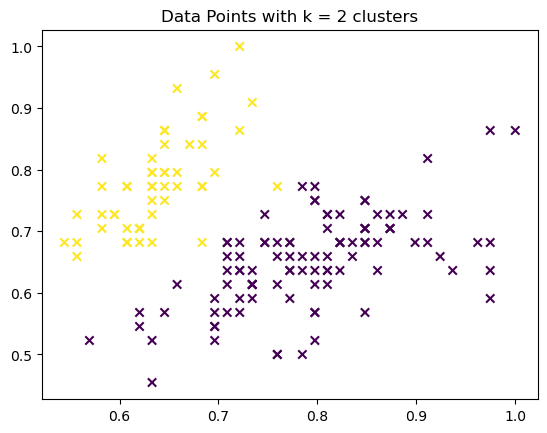

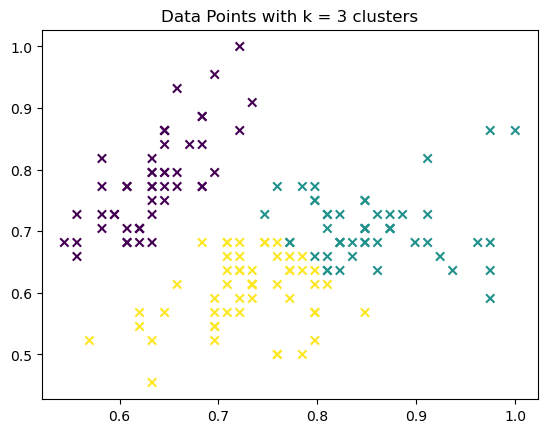

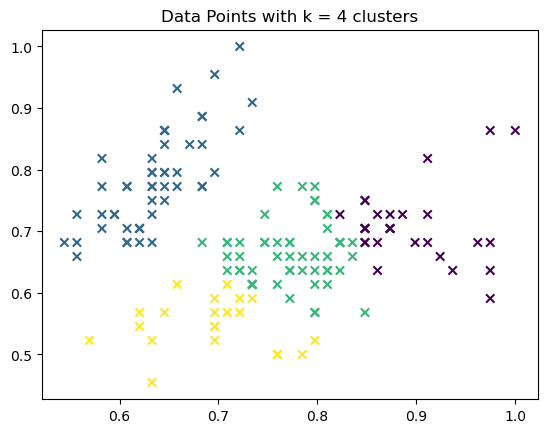

In [208]:
X = normalized_compounds.to_numpy()
for i in range(2, 5):
    km = KMeans(i)
    X = X[:, 0:2]
    res = km.cluster(X)
    assert len(res) == X.shape[0]
    plt.scatter(X[:, 0], X[:, 1], c=res, marker='x', label='Centroids')
    plt.title(f'Data Points with k = {i} clusters')
    plt.show()

# (b)
It seems like k = 3 makes the most sense.  It helps divide the bottom "clump" into 2 clusters since there is a lot of variance.

## (c)

### [IMPORTANT] Use the following function to validate your result. See the example in the docstring for usage.

*For debuuging: you will get output like (not the same as) this*:

```
Class 0 - amide: 48 out of 50 are classified correctly
Class 1 - ether: 46 out of 50 are classified correctly
Class 2 - phenol: 50 out of 50 are classified correctly
```

In [209]:
def validate(y_pred, y_true):
    """
    Validate the results of clustering
    
    Parameters
    ---------
    y_pred: np.ndarray
        Predicted clusters
    y_true: list or np.ndarray
        Ground truth clusters
    
    Example
    ------
    >>> validate(model.cluster(features), df['type'].values)
    """
    # correct classification
    compounds = np.unique(y_true) # should be ['amide','phenol','ether'] for compounds dataset
    clusters = [np.where(y_true == c)[0] for c in compounds]
    pred_class = np.unique(y_pred)
    
    #remove -1 for noise point in DBSCAN
    pred_class = np.delete(pred_class, np.where(pred_class == -1))
    assert len(pred_class) == len(compounds), \
        f'Predicted clusters has less or more than {len(compounds)} classes: {pred_class}'
    for i in range(3):
        #loop over solutions
        counts = []
        scores = []
        for j in range(3):
            # loop over clusters of true assignments
            sol_i = np.where(y_pred == pred_class[i])[0]
            counts.append(len(np.intersect1d(sol_i, clusters[j])))
            scores.append(counts[-1] / len(clusters[j]))
        idx = np.argmax(scores)
        print(
            f'Class {pred_class[i]} - {compounds[idx]}: {counts[idx]} out of {len(clusters[j])}'
            ' are classified correctly'
        ) 

In [210]:
X = normalized_compounds.to_numpy()
validate(KMeans(3).cluster(X[:, :4]), normalized_compounds['type'].values)

Class 0 - ether: 46 out of 50 are classified correctly
Class 1 - phenol: 50 out of 50 are classified correctly
Class 2 - amide: 48 out of 50 are classified correctly


# (c)
This classification is very good.  The success rate is over 90%.

## (d)

In [225]:
ntrials = 1000
count = 0
for i in range(ntrials):
    kmeans = KMeans(4) # Comment out the re-init code in KMeans
    results = kmeans.cluster(X[:, 0:2])
    if len(np.unique(results)) == 4:
        count += 1
print(f'Out of {ntrials} number of KMeans trials, only {count} gives 4 clusters')

c:\Users\artui\miniforge3\envs\c242\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\artui\miniforge3\envs\c242\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\artui\AppData\Local\Temp\ipykernel_11480\1145821954.py:40: UserWarning: Warning: At least one centroid vanishes
  warnings.warn('Warning: At least one centroid vanishes')
C:\Users\artui\AppData\Local\Temp\ipykernel_11480\1145821954.py:43: UserWarning: Warning: Maximum number of iterations reached!
  warnings.warn("Warning: Maximum number of iterations reached!")


Out of 1000 number of KMeans trials, only 988 gives 4 clusters


# (d)
When we calculate the mean of a bad centroid, we can see that we are not able to because there are no points assigned to that centroid.  So it is important to make sure that all centroids have at least one point assigned to them, otherwise that centroid will "disappear".

# Question 2

## (a)

*Hint*:
+ Use `sklearn.cluster.DBSCAN` and adjust `eps`(Rcut) and `min_samples`(MinPts) parameters.**
+ Core points are stored in `core_sample_indices_` attribute.
+ Cluster results are stored in `labels_` attribute and noise points are labeled as -1.


In [223]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.05, min_samples=5)
db.fit(X[:, 0:4])
print(db.core_sample_indices_)
print(db.labels_)
num_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print("Number of clusters:", num_clusters)
print(f"Number of core points: {len(db.core_sample_indices_)}")
print(f"Number of border points: {len(db.labels_) - len(db.core_sample_indices_)}")
print(f"Number of noise points: {np.sum(db.labels_ == -1)}")


[   0    1    2 ... 1497 1498 1499]
[0 1 1 ... 0 0 0]
Number of clusters: 3
Number of core points: 1335
Number of border points: 165
Number of noise points: 53


# (a)
We only classified 114 points correctly using KMeans, so DBSCAN is a better improvement over KMeans

## (b)

*Hint: To visualize the clusters, you can use `plt.scatter` and set the `c` parameters. Refer to Tutorial 5.*

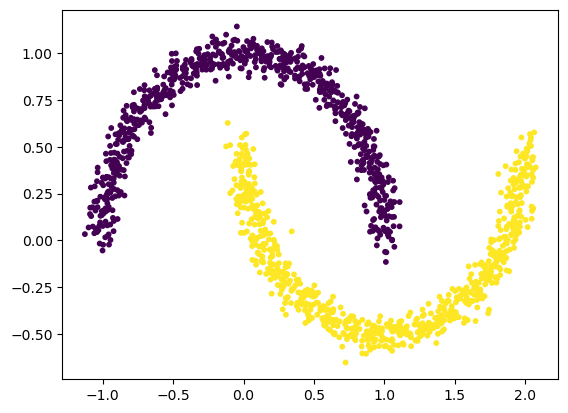

In [213]:
from sklearn import datasets

def moon_dataset(n_samples=1500):
    """
    Generate datasets. We choose the size big enough to see the scalability
    of the algorithms, but not too big to avoid too long running times
    
    Parameters
    ---------
    n_samples: int
        Number of data points
    
    Returns
    ------
    X: np.ndarray
        Data points, shape (n_samples, 2)
    y: np.ndarray
        Clusters that each point belongs to, shape (n_samples)
    """
    np.random.seed(0)
    n_samples = 1500
    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
    X, y = noisy_moons
    return X, y

X, y = moon_dataset()
plt.scatter(X[:, 0], X[:, 1], s=10, c=y)

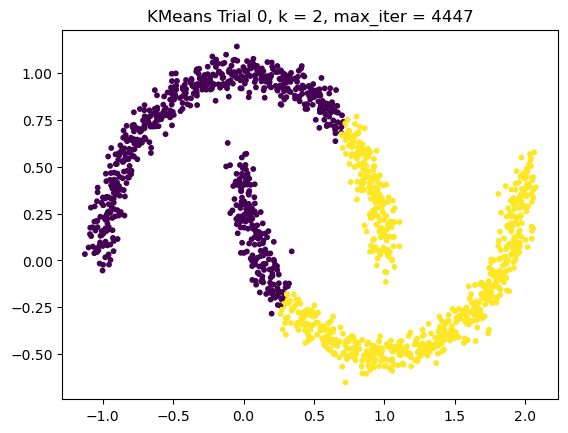

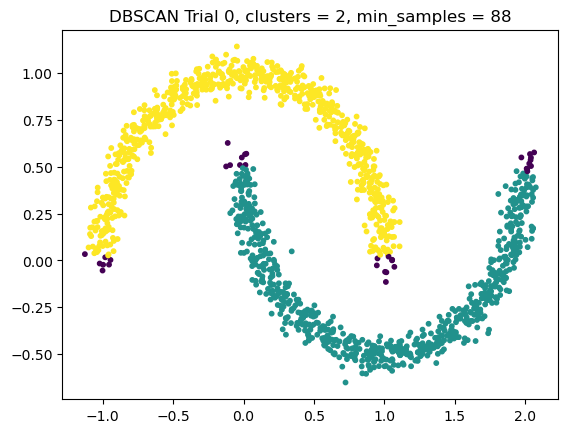

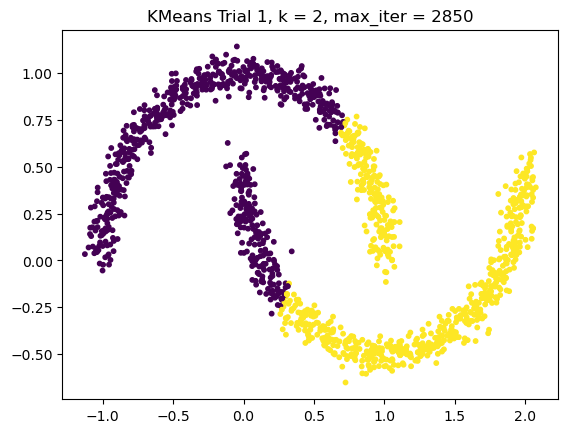

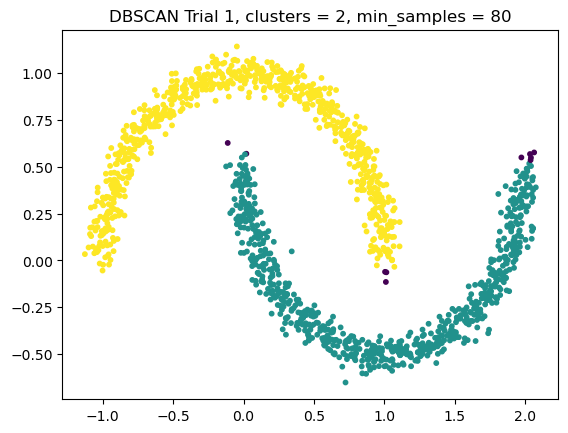

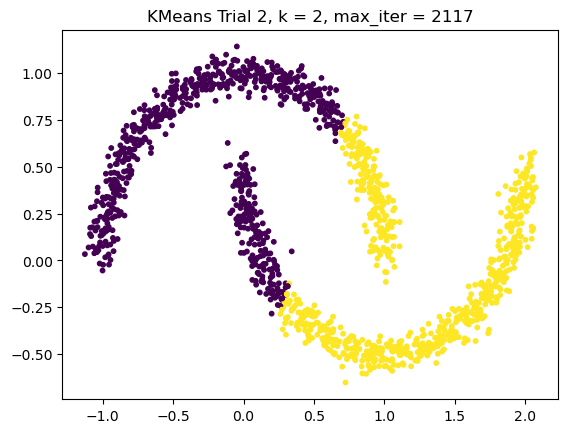

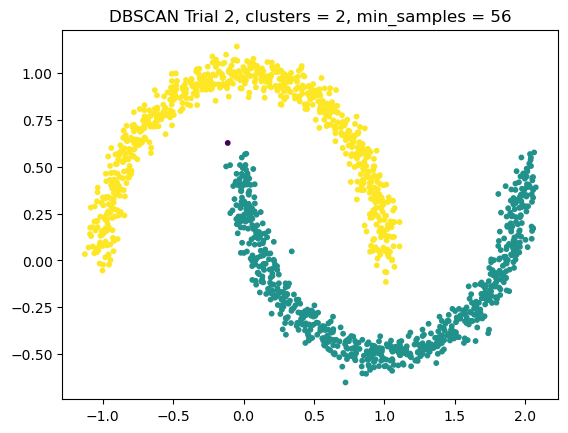

In [214]:
max_iters_tries = []
min_sample_tries = []
for i in range(3):
    mi = np.random.randint(1000, 5000)
    assert mi not in max_iters_tries
    max_iters_tries.append(mi)
    km = KMeans(2, mi)
    km_res = km.cluster(X)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=km_res)
    plt.title(f"KMeans Trial {i}, k = {km.k}, max_iter = {km.max_iter}")
    plt.show()

    ms = np.random.randint(5, 100)
    assert ms not in min_sample_tries
    min_sample_tries.append(ms)
    db = DBSCAN(eps=0.2, min_samples=ms)
    db_res = db.fit_predict(X)
    num_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

    plt.scatter(X[:, 0], X[:, 1], s=10, c=db_res)
    plt.title(f"DBSCAN Trial {i}, clusters = {num_clusters}, min_samples = {ms}")
    plt.show()



# (b)

DBSCAN did a much better job, and correctly identified a few noise outliers.  KMeans was not able to correctly separate the 2 moons.  When data is nonlinear, we can see that DBSCAN does a much better job, whereas KMeans performs better on linear data.  In addition, there is much more noise in our data, something that the compounds.csv does not have.  Noisy data is better classified by DBSCAN.

# Question 3

## (a)

In [215]:
import pandas as pd
import numpy as np

compounds_data = pd.read_csv("Datasets/compounds.csv")
normalized_compounds = compounds_data.copy()
for f in features:
    normalized_compounds[f] = (normalized_compounds[f] - np.mean(normalized_compounds[f])) / np.std(normalized_compounds[f])
normalized_compounds = normalized_compounds.to_numpy()
normalized_compounds[:, -1] = normalized_compounds[:, -1].astype(int)

## (b)

In [216]:
def calculate_centroids(features, clusters):
    centroids = []
    for i in range(3):
        cluster_points = features[clusters == i]
        centroids.append(np.mean(cluster_points, axis=0))
    centroids = np.array(centroids)
    return centroids


In [217]:
centroids = calculate_centroids(normalized_compounds[:, :4], normalized_compounds[:, -1])
for i in range(len(centroids)):
    print(f"Centroid {i} is at {centroids[i]}")

Centroid 0 is at [-0.03311921792126513 -0.0555367116316934 -0.008340303251756685
 0.03856540453901613]
Centroid 1 is at [0.10985886920224347 0.041652533723768946 0.10425379064696283
 0.09115459254676563]
Centroid 2 is at [-0.07673965128097966 0.013884177907922584 -0.09591348739520532
 -0.12971999708578216]


## (c)

*For debugging: should be 596.4585801741025*

In [218]:
# If you feel the code is slow in Q3(d), use numba to accelerate it
# import numba

# @numba.njit()
def cost_func(features, centroids, clusters):
    """
    Parameters
    ----------
    features: np.ndarray
        Feature matrix, shape (n_samples, n_features). In the compound dataset, n_features = 4.
    centroids: np.ndarray
        Centroids of each cluster, shape (n_cluster, n_features). In this question, n_cluster = 3.
    clusters: np.ndarray
        Cluster which each datapoint belongs to. shape (n_samples,)
    """
    centroids = centroids.astype(np.float64)
    features = features.astype(np.float64)
    costs = []
    for i in range(len(centroids)):
        mask = clusters == i
        distances = cdist(features[mask], [centroids[i]], metric='euclidean')
        distances = np.square(distances)
        costs.append(distances)

    total_cost = np.sum([np.sum(arr) for arr in costs])
    #print(f"Total cost: {total_cost}")
    return total_cost

In [219]:
print(f"Total cost: {cost_func(normalized_compounds[:, :-2], centroids, normalized_compounds[:, -1])}")

Total cost: 596.4585801741024


## (d)

*For debugging*: 
+ Cooling schedule should be like: `array([500. , 499.5, 499.0005, ..., 3.37065784, 3.36728719, 3.3639199])`
+ Cost function can drop to around 540 (or even smaller).

In [220]:
def SA(features, cluster, schedule, report_interval=100):
    """
    Simulated Annealing for clustering
    
    Parameters
    ----------
    features: numpy.ndarray
        Feature matrix. shape (n_samples, n_features)
    cluster: numpy.ndarray
        Initial guess of clusters. shape (n_samples,)
    schedule: numpy.ndarray
        Cooling schedule.
    report_interval: int
        Interval of steps to report result
    
    Returns
    ------
    res: dict
        Result containing the best clustering with the cost function value
    """
    # calculate the centroids
    centroids = calculate_centroids(features, cluster)
    # calulate the cost fucntion
    cluster_eval = cost_func(features, centroids, cluster)
    best_cluster = cluster.copy()
    lowest_eval = cluster_eval

    for step, temp in enumerate(schedule):
        if step % report_interval == 0:
            print(step, temp, lowest_eval)
        for n in range(features.shape[0]):
            trial = cluster.copy()
            # Do a Metroplis step by swtiching a sample to differenct cluster
            choices = [0, 1, 2]
            choices.remove(trial[n]) # remove the current cluster
            rand_choice = np.random.choice(choices)  # choose a different cluster
            trial[n] = rand_choice # switch the cluster
            
            # calculate the centroids & cost function
            trial_centroids = calculate_centroids(features, trial)
            trial_eval = cost_func(features, trial_centroids, trial)
            # Metroplis rule
            #:
            if trial_eval < cluster_eval or np.random.uniform() < np.exp((cluster_eval - trial_eval) / temp):
                cluster = trial
                cluster_eval = trial_eval
                if trial_eval < lowest_eval:
                    best_cluster = cluster.copy()
                    lowest_eval = cluster_eval
                    
    return {"solution": best_cluster, "evaluation": lowest_eval}

In [221]:
def geometric_cooling(init_temp, num_steps, alpha):
    sched = np.zeros(num_steps)
    sched[0] = init_temp
    for i in range(1, num_steps):
        sched[i] = alpha * sched[i-1]
    print(sched)
    sa = SA(normalized_compounds[:, :4], normalized_compounds[:, -1], sched, report_interval=1000)
    return sa

In [222]:
for i in range(3):
    print(f"## Trial {i} ##")
    res = geometric_cooling(500, 5000, 0.999)
    validate(res["solution"], normalized_compounds[:, -2])

## Trial 0 ##
[500.         499.5        499.0005     ...   3.37065784   3.36728719
   3.3639199 ]
0 500.0 596.4585801741024


1000 183.84771238548197 534.2107049085148
2000 67.5999626987498 534.2107049085148
3000 24.856196999018103 520.4455895003753
4000 9.139509913744712 497.99316971762954
Class 0 - phenol: 50 out of 50 are classified correctly
Class 1 - ether: 23 out of 50 are classified correctly
Class 2 - amide: 29 out of 50 are classified correctly
## Trial 1 ##
[500.         499.5        499.0005     ...   3.37065784   3.36728719
   3.3639199 ]
0 500.0 596.4585801741024
1000 183.84771238548197 535.1690871531202
2000 67.5999626987498 529.9535558867739
3000 24.856196999018103 529.9535558867739
4000 9.139509913744712 516.3465227063222
Class 0 - amide: 26 out of 50 are classified correctly
Class 1 - phenol: 49 out of 50 are classified correctly
Class 2 - ether: 35 out of 50 are classified correctly
## Trial 2 ##
[500.         499.5        499.0005     ...   3.37065784   3.36728719
   3.3639199 ]
0 500.0 596.4585801741024
1000 183.84771238548197 535.327200545702
2000 67.5999626987498 535.327200545702
3000 24

# (d)

In general, the assignment was not as good as it was in KMeans.  KMeans performs better than simulated annealing.  In general, simulated annealing is very sensitive to the initial condition.  Since our cost function evaluation was already so high, it will have a hard time finding the best evaluation.